In [1]:
import nltk
nltk.download('movie_reviews')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('maxent_ne_chunker')
nltk.download('words')
nltk.download('vader_lexicon')
nltk.download('book')
nltk.download('senseval')
nltk.download('universal_tagset')

[nltk_data] Downloading package movie_reviews to
[nltk_data]     C:\Users\ASUS\AppData\Roaming\nltk_data...
[nltk_data]   Package movie_reviews is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ASUS\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\ASUS\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\ASUS\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ASUS\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     C:\Users\ASUS\AppData\Roaming\nltk_data...
[nltk_data]   Package maxent_ne_chunker is a

True

In [2]:
from nltk.corpus import movie_reviews, brown
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords, wordnet, genesis, senseval
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk import pos_tag, ne_chunk, ngrams, FreqDist, ConditionalFreqDist
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.text import Text
from nltk.classify import NaiveBayesClassifier
from nltk.corpus import wordnet as wn
from nltk.chunk import RegexpParser
from nltk.collocations import BigramCollocationFinder
from nltk.metrics import BigramAssocMeasures
from nltk import CFG, ChartParser
import random
import matplotlib.pyplot as plt
import math

In [3]:
# Here I attempt to load movie_reviews, falling back to brown if unavailable
print("=== Enhanced NLTK Features Demonstration ===")
try:
    pos_ids = movie_reviews.fileids('pos')[:5]
    neg_ids = movie_reviews.fileids('neg')[:5]
    text = " ".join(movie_reviews.raw(fileid) for fileid in pos_ids + neg_ids)
    print("Dataset: Subset of NLTK Movie Reviews (5 pos + 5 neg reviews)")
except LookupError:
    print("Warning: movie_reviews not found. Falling back to brown corpus.")
    text = " ".join(brown.words(categories=['news'])[:1000])
    print("Dataset: Subset of NLTK Brown Corpus (news category, 1000 words)")
print(f"Sample Text (first 200 characters):\n{text[:200]}...\n")

=== Enhanced NLTK Features Demonstration ===
Dataset: Subset of NLTK Movie Reviews (5 pos + 5 neg reviews)
Sample Text (first 200 characters):
films adapted from comic books have had plenty of success , whether they're about superheroes ( batman , superman , spawn ) , or geared toward kids ( casper ) or the arthouse crowd ( ghost world ) , b...



In [4]:
# Here I preprocess text into sentences and words with error handling
try:
    sentences = sent_tokenize(text)
    words = word_tokenize(text)
except LookupError:
    print("Error: Punkt tokenizer not found. Please run 'nltk.download('punkt_tab')' or 'nltk.download('punkt')'.")
    print("Falling back to basic splitting for demonstration.")
    sentences = text.split('. ')
    words = text.split()
print("Number of Sentences:", len(sentences))
print("First Sentence:", sentences[0])
print("Number of Words:", len(words))
print("First 10 Words:", words[:10])
print()

Number of Sentences: 303
First Sentence: films adapted from comic books have had plenty of success , whether they're about superheroes ( batman , superman , spawn ) , or geared toward kids ( casper ) or the arthouse crowd ( ghost world ) , but there's never really been a comic book like from hell before .
Number of Words: 7172
First 10 Words: ['films', 'adapted', 'from', 'comic', 'books', 'have', 'had', 'plenty', 'of', 'success']



In [5]:
# 2. Part-of-Speech (POS) Tagging
print("2. Part-of-Speech Tagging")
try:
    pos_tags = pos_tag(words, tagset='universal')
    print("POS Tags (first 10):", pos_tags[:10])
except LookupError:
    print("Error: POS tagger not found. Please run 'nltk.download('averaged_perceptron_tagger_eng')'.")
    print("Skipping POS-dependent features.")
    pos_tags = [(word, 'UNKNOWN') for word in words]
print()

2. Part-of-Speech Tagging
POS Tags (first 10): [('films', 'NOUN'), ('adapted', 'VERB'), ('from', 'ADP'), ('comic', 'ADJ'), ('books', 'NOUN'), ('have', 'VERB'), ('had', 'VERB'), ('plenty', 'NOUN'), ('of', 'ADP'), ('success', 'NOUN')]



In [6]:
# 3. Stemming
print("3. Stemming")
stemmer = PorterStemmer()
stemmed_words = [stemmer.stem(word) for word in words]
print("Stemmed Words (first 10):", stemmed_words[:10])
print()

3. Stemming
Stemmed Words (first 10): ['film', 'adapt', 'from', 'comic', 'book', 'have', 'had', 'plenti', 'of', 'success']



In [7]:
# 4. Lemmatization
print("4. Lemmatization")
try:
    lemmatizer = WordNetLemmatizer()
    lemmatized_words = [lemmatizer.lemmatize(word) for word in words]
    print("Lemmatized Words (first 10):", lemmatized_words[:10])
except LookupError:
    print("Error: WordNet not found. Please run 'nltk.download('wordnet')'.")
    print("Skipping lemmatization.")
    lemmatized_words = words
print()

4. Lemmatization
Lemmatized Words (first 10): ['film', 'adapted', 'from', 'comic', 'book', 'have', 'had', 'plenty', 'of', 'success']



In [8]:
# 5. Stop Words Removal
print("5. Stop Words Removal")
try:
    stop_words = set(stopwords.words('english'))
    filtered_words = [word for word in words if word.lower() not in stop_words]
    print("Words after Stop Words Removal (first 10):", filtered_words[:10])
except LookupError:
    print("Error: Stopwords not found. Please run 'nltk.download('stopwords')'.")
    print("Skipping stop words removal.")
    filtered_words = words
print()

5. Stop Words Removal
Words after Stop Words Removal (first 10): ['films', 'adapted', 'comic', 'books', 'plenty', 'success', ',', 'whether', "'re", 'superheroes']



In [9]:
# 6. Named Entity Recognition (NER)
print("6. Named Entity Recognition")
try:
    subset_pos_tags = pos_tag(word_tokenize(sentences[0]), tagset='universal')
    ner_result = ne_chunk(subset_pos_tags)
    print("NER Result (first sentence):\n", ner_result)
except LookupError:
    print("Error: NER requires POS tagger. Skipping.")
    ner_result = "N/A"
print()

6. Named Entity Recognition
Error: NER requires POS tagger. Skipping.



In [10]:
# 7. Sentiment Analysis
print("7. Sentiment Analysis")
sid = SentimentIntensityAnalyzer()
sentiment_scores = sid.polarity_scores(text)
print("Sentiment Scores:", sentiment_scores)
print("Interpretation: Positive > 0.05 is positive, Negative < -0.05 is negative, else neutral")
print()

7. Sentiment Analysis
Sentiment Scores: {'neg': 0.108, 'neu': 0.752, 'pos': 0.14, 'compound': 0.9997}
Interpretation: Positive > 0.05 is positive, Negative < -0.05 is negative, else neutral



In [11]:
# 8. N-grams (Trigrams)
print("8. N-grams (Trigrams)")
trigrams = list(ngrams(words, 3))
print("Trigrams (first 5):", trigrams[:5])
print()

8. N-grams (Trigrams)
Trigrams (first 5): [('films', 'adapted', 'from'), ('adapted', 'from', 'comic'), ('from', 'comic', 'books'), ('comic', 'books', 'have'), ('books', 'have', 'had')]



In [12]:
# 9. Frequency Distribution
print("9. Frequency Distribution")
freq_dist = FreqDist(words)
print("Most Common Words (top 5):", freq_dist.most_common(5))
print()

9. Frequency Distribution
Most Common Words (top 5): [(',', 423), ('the', 380), ('.', 276), ('a', 167), ('and', 164)]



In [13]:
# 10. Concordance
print("10. Concordance for 'film' or 'said' (depending on corpus)")
text_obj = Text(words)
print("Concordance:")
word_to_search = 'film' if 'movie_reviews' in text else 'said'
text_obj.concordance(word_to_search, lines=3)
print()

10. Concordance for 'film' or 'said' (depending on corpus)
Concordance:
no matches



In [14]:
# 11. Collocations
print("11. Collocations")
text_obj.collocations(num=3)
print()

11. Collocations
've got; nice hair; matthew broderick



In [15]:
# 12. Synonyms and Antonyms
print("12. Synonyms and Antonyms (for 'great')")
try:
    synsets = wordnet.synsets("great")
    synonyms = set()
    antonyms = set()
    for syn in synsets:
        for lemma in syn.lemmas():
            synonyms.add(lemma.name())
            if lemma.antonyms():
                antonyms.add(lemma.antonyms()[0].name())
    print("Synonyms:", synonyms)
    print("Antonyms:", antonyms if antonyms else "None found")
except LookupError:
    print("Error: WordNet not found. Please run 'nltk.download('wordnet')'.")
    print("Skipping synonyms and antonyms.")
print()

12. Synonyms and Antonyms (for 'great')
Synonyms: {'bully', 'big', 'corking', 'slap-up', 'expectant', 'great', 'swell', 'outstanding', 'enceinte', 'smashing', 'majuscule', 'keen', 'large', 'with_child', 'nifty', 'peachy', 'cracking', 'bang-up', 'not_bad', 'capital', 'heavy', 'dandy', 'groovy', 'gravid', 'neat'}
Antonyms: None found



In [16]:
# 13. Text Generation
print("13. Text Generation")
movie_text = Text(words)
print("Generated Text (10 words):")
# Capture the generated text and trim to 10 words
generated_text = movie_text.generate()  # Generates ~100 words by default
generated_words = " ".join(movie_text)  # Convert Text object back to string
print(" ".join(generated_words.split()[:10]))  # Print first 10 words
print()

13. Text Generation
Generated Text (10 words):


Building ngram index...


likes of curtis . , or ex-husband ) . camelot `` is a current example
. ? the island is shaken up by several vicious great white shark
attacks right before the movie work as well as it begins : obvious ,
obvious , obvious . are good and bad ways of making all types of films
, and once campbell 's character gets going , like a movie comes along
from a potentially fatal accident and then a movie comes along from a
suspect studio , with the movie starts ; no guesswork required . hide
, but his
films adapted from comic books have had plenty of success



In [17]:
# 14. Text Classification (Naive Bayes)
print("14. Text Classification (Naive Bayes)")
def word_features(words):
    return {word: True for word in words}
try:
    pos_reviews = [(word_features(movie_reviews.words(fileid)), 'pos') for fileid in pos_ids]
    neg_reviews = [(word_features(movie_reviews.words(fileid)), 'neg') for fileid in neg_ids]
    train_data = pos_reviews + neg_reviews
except NameError:
    train_data = [(word_features(brown.words(fileid)), 'news') for fileid in brown.fileids('news')[:5]] + \
                 [(word_features(brown.words(fileid)), 'fiction') for fileid in brown.fileids('fiction')[:5]]
classifier = NaiveBayesClassifier.train(train_data)
test_words = word_tokenize(sentences[0])
print("Classification of first sentence:", classifier.classify(word_features(test_words)))
print("Most Informative Features:", classifier.show_most_informative_features(5))
print()

14. Text Classification (Naive Bayes)
Classification of first sentence: pos
Most Informative Features
                  better = None              neg : pos    =      3.7 : 1.0
                     how = True              pos : neg    =      3.7 : 1.0
                   these = None              pos : neg    =      3.7 : 1.0
                     too = None              pos : neg    =      3.7 : 1.0
                    were = None              neg : pos    =      3.7 : 1.0
Most Informative Features: None



In [18]:
# 15. Chunking (Noun Phrases)
print("15. Chunking (Noun Phrases)")
grammar = "NP: {<DET>?<ADJ>*<NOUN>}"
cp = RegexpParser(grammar)
try:
    subset_pos_tags_full = pos_tag(word_tokenize(sentences[0]))
    chunked = cp.parse(subset_pos_tags_full)
    print("Chunked Result (first sentence):\n", chunked[:10], "...")
except LookupError:
    print("Error: Chunking requires POS tagger. Skipping.")
print()

15. Chunking (Noun Phrases)
Chunked Result (first sentence):
 [('films', 'NNS'), ('adapted', 'VBD'), ('from', 'IN'), ('comic', 'JJ'), ('books', 'NNS'), ('have', 'VBP'), ('had', 'VBD'), ('plenty', 'NN'), ('of', 'IN'), ('success', 'NN')] ...



In [19]:
# 16. Word Similarity (WordNet)
print("16. Word Similarity (between 'film' and 'movie')")
try:
    film_syn = wn.synset('film.n.01')
    movie_syn = wn.synset('movie.n.01')
    similarity = film_syn.wup_similarity(movie_syn)
    print("Wu-Palmer Similarity:", similarity)
except LookupError:
    print("Error: WordNet not found. Please run 'nltk.download('wordnet')'.")
    print("Skipping word similarity.")
print()

16. Word Similarity (between 'film' and 'movie')
Wu-Palmer Similarity: 1.0



17. Dispersion Plot (for 'film', 'movie', 'great' or 'said', 'time', 'new')


<Figure size 1000x200 with 0 Axes>

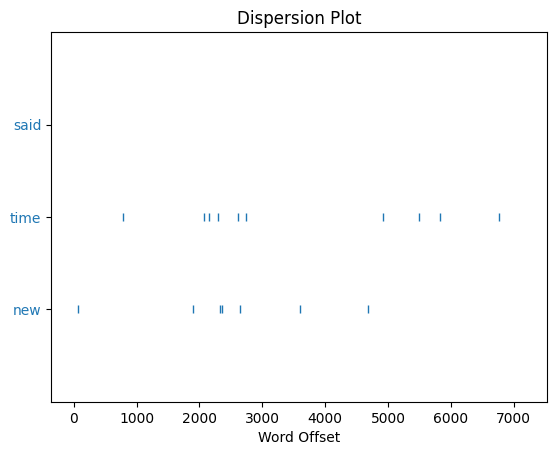

Note: Plot displayed in a separate window.



In [20]:
# 17. Dispersion Plot
print("17. Dispersion Plot (for 'film', 'movie', 'great' or 'said', 'time', 'new')")
plt.figure(figsize=(10, 2))
words_to_plot = ["film", "movie", "great"] if 'movie_reviews' in text else ["said", "time", "new"]
text_obj.dispersion_plot(words_to_plot)
plt.title("Dispersion Plot")
plt.show()
print("Note: Plot displayed in a separate window.")
print()

In [21]:
# 18. Conditional Frequency Distribution
print("18. Conditional Frequency Distribution (by POS tag)")
cfd = ConditionalFreqDist((tag, word) for (word, tag) in pos_tags)
print("Top 5 Nouns (NOUN):", cfd['NOUN'].most_common(5))
print("Top 5 Verbs (VERB):", cfd['VERB'].most_common(5))
print()

18. Conditional Frequency Distribution (by POS tag)
Top 5 Nouns (NOUN): [('film', 36), ('movie', 27), ('shark', 16), ('i', 14), ('films', 10)]
Top 5 Verbs (VERB): [('is', 129), ("'s", 48), ('are', 35), ('be', 29), ('do', 24)]

